<a href="https://colab.research.google.com/github/dirknbr/hier_keras/blob/main/estimate_hier_model_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierachical model in TF

We have n = 100 and 10 groups

$y_i = a_s + b x_i + \epsilon_i$

$a_s \sim N(a, ...)$

Loss 

$mse(y, pred) + \lambda |a_s - a|$

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
n = 100
S = 10 # segments
x = np.random.normal(size=n).astype(np.float32)
s = np.random.choice(S, n)
a = np.random.normal(1, 1, size=S)
y = (a[s] + x + np.random.normal(size=n)).astype(np.float32)
print(y.mean())

0.84523886


In [ ]:
def loss(lam, a_s, a):
  def _loss(y, y_pred):
    mse = tf.reduce_mean(tf.pow(y - y_pred, 2))
    pen = lam * tf.norm(a_s - a)
    return mse + pen
  return _loss

lam = .2
a_s = np.ones(S).astype(np.float32)
a_a = 0.
print(loss(lam, a_s, a_a)(y, 0.))

tf.Tensor(4.3290668, shape=(), dtype=float32)


In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.a = tf.Variable(np.random.normal())
    self.a_s = tf.Variable(np.random.normal(size=S).astype(np.float32), shape=S)
    self.b = tf.Variable(np.random.normal())
    # print(self.a.dtype, self.a_s.dtype)

  def call(self, inputs):
    x, s = inputs
    pred = tf.gather(self.a_s, s) + self.b * x
    return pred

model = MyModel()

In [ ]:
adam = tf.keras.optimizers.Adam(lr=.1)
model.compile(loss=loss(lam, model.a_s, model.a), optimizer=adam)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# check gather
xx = tf.Variable([1., 2.])
tf.gather(xx, [1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [ ]:
# sidx = tf.constant(s, dtype=tf.int32)
# print(sidx)
model.predict([x, s])

array([ 0.32101524,  0.36131972,  0.2576491 , -0.89955145, -0.33168727,
       -0.2079846 ,  1.600967  ,  1.7127635 , -0.7316433 , -0.27495033,
        0.52702904, -0.7142322 ,  1.0643897 ,  1.2795174 , -0.12728673,
        0.10218421, -0.7558011 , -1.0581867 ,  0.8451338 ,  0.20960307,
       -1.426439  , -1.8964554 ,  0.34759447, -0.54192024,  0.07200885,
        0.20312594,  1.3092117 ,  0.34378594,  0.543006  ,  0.06212038,
       -0.81742096,  0.13314992, -0.29335523,  0.3681361 , -0.1540165 ,
        1.4850848 , -0.28180188, -0.4796902 ,  0.25313455,  0.6306188 ,
       -0.14532214,  1.0838306 , -2.1297307 , -0.8704872 , -0.12384045,
        0.66583884, -1.3304828 , -0.10569477,  1.6889453 ,  0.5351421 ,
        0.15461253, -0.5296541 ,  1.1173967 ,  0.52800435,  0.12044698,
       -0.08713645, -0.4022668 ,  0.13508493,  0.5172523 , -0.27752203,
       -0.7227569 ,  1.1321975 , -1.1688563 , -2.068478  , -0.6096046 ,
        0.05554645, -0.6409866 , -0.00683391,  1.4723088 , -0.17

In [ ]:
model.fit([x, s], y, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 3.2449
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 2.4965
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 2.1664
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.9237
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7433
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6439
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5679
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5142
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5005
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4858
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4882
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5007
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [ ]:
model.a_s, a

(<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
 array([ 0.503964  ,  1.5952309 ,  0.22881734, -0.29515716,  1.6124464 ,
         0.524153  ,  1.4994751 ,  2.0510995 ,  0.41089475,  2.1225126 ],
       dtype=float32)>,
 array([ 0.64861722,  1.54170266,  0.12485574, -0.60684516,  2.19078692,
        -0.13058172,  2.10488417,  2.62546552,  0.45560249,  1.75351156]))

In [ ]:
model.a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.01284>

In [ ]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.004491>

In [ ]:
pred = model.predict([x, s])

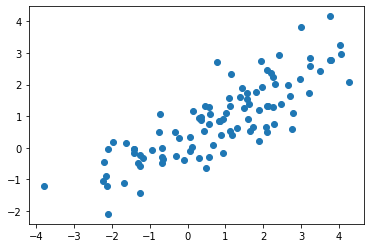

In [ ]:
plt.scatter(y, pred)

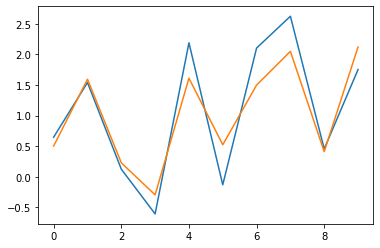

In [ ]:
# true and estimated group intercepts
plt.plot(a)
plt.plot(model.a_s.numpy())